In [1]:
#using Pkg
#Pkg.activate("../../my_environment")

using Graphs
using MetaGraphsNext
using Revise
using DataStructures
includet("../visu.jl")
includet("io.jl")

MethodError: MethodError: no method matching MetaGraph()

Closest candidates are:
  MetaGraph(!Matched::AbstractGraph{Code}, !Matched::Array{Pair{Label, VertexData}, 1}, !Matched::Array{Pair{Tuple{Label, Label}, EdgeData}, 1}) where {Code, Label, VertexData, EdgeData}
   @ MetaGraphsNext ~/.julia/packages/MetaGraphsNext/KWB3R/src/metagraph.jl:145
  MetaGraph(!Matched::AbstractGraph{Code}, !Matched::Array{Pair{Label, VertexData}, 1}, !Matched::Array{Pair{Tuple{Label, Label}, EdgeData}, 1}, !Matched::Any) where {Code, Label, VertexData, EdgeData}
   @ MetaGraphsNext ~/.julia/packages/MetaGraphsNext/KWB3R/src/metagraph.jl:145
  MetaGraph(!Matched::AbstractGraph{Code}, !Matched::Array{Pair{Label, VertexData}, 1}, !Matched::Array{Pair{Tuple{Label, Label}, EdgeData}, 1}, !Matched::Any, !Matched::Any) where {Code, Label, VertexData, EdgeData}
   @ MetaGraphsNext ~/.julia/packages/MetaGraphsNext/KWB3R/src/metagraph.jl:145
  ...


In [2]:
for i in 1:5

    mg = MetaDiGraph()

    set_prop!(mg, :name, "triangle_" * string(i))
    set_prop!(mg, :type, "virtual")

    add_vertices!(mg, 3)
    add_edge!(mg, 1, 2)
    add_edge!(mg, 2, 3)
    add_edge!(mg, 3, 1)
    add_edge!(mg, 3, 2)

    for node in vertices(mg)
        set_prop!(mg, node, :dem, rand(1:2))
    end
    for edge in edges(mg)
        set_prop!(mg, edge, :dem, rand(1:2))
    end
    write_graph_to_json(mg)
end

UndefVarError: UndefVarError: `MetaDiGraph` not defined

In [7]:
# generating a clique of size n
n = 5
mg = MetaGraph(
    DiGraph(),
    Int,
    Dict,
    Dict,
    Dict(:name=>"clique_" * string(n), :type=>"substrate")
)

for i in 1:n
    add_vertex!(mg, i, Dict(:cap=> 1, :cost => 1))
end

for i in 1:n
    for j in 1:n
        if i!=j
            add_edge!(mg, i, j, Dict(:cap => 1, :cost => 1))
        end
    end
end

write_s_network_to_json(mg)

In [8]:
# generating a wheel with n 
n = 3
mg = MetaGraph(
    DiGraph(),
    Int,
    Dict,
    Dict,
    Dict(:name=>"wheel_" * string(n), :type=>"virtual")
)

add_vertex!(mg, 1, Dict(:dem=> 1))
add_vertex!(mg, 2, Dict(:dem=> 1))
add_edge!(mg, 2, 1, Dict(:dem=>1))

for i in 3:n+1
    add_vertex!(mg, i, Dict(:dem=> 1))            
    add_edge!(mg, i, 1, Dict(:dem=>1))
    add_edge!(mg, i-1, i, Dict(:dem=>1))
end
add_edge!(mg, n+1, 2, Dict(:dem=>1))

write_network_to_json(mg)

410

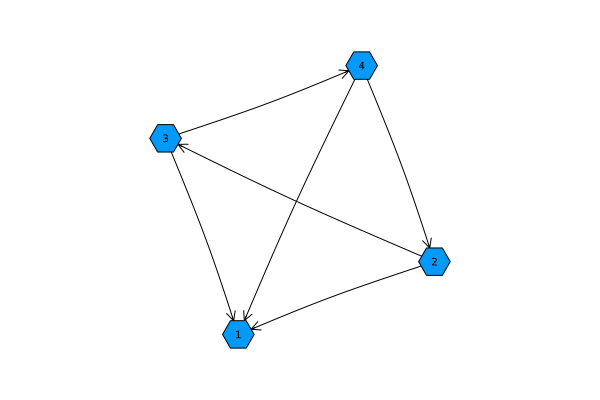

In [9]:
visu_graph(mg)